In [3]:
import numpy as np
import pandas as pd
from scipy import integrate, stats

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

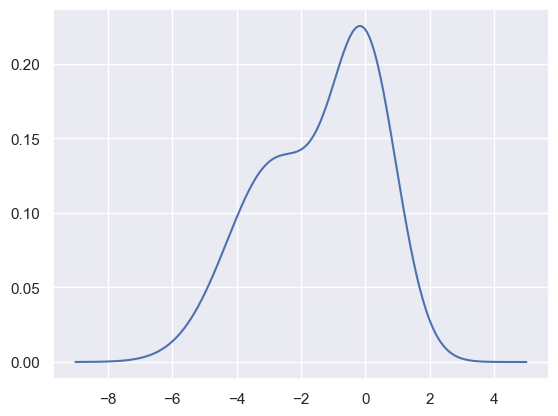

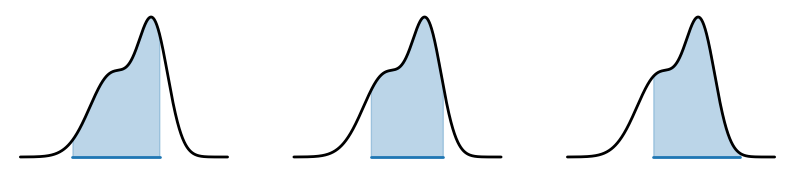

In [4]:

N = 1000
t = np.linspace(-9, 5, N)
dx = t[1] - t[0]
p = (
    stats.norm(0, 1).pdf(t)
    + stats.norm(-2.8, 1.5).pdf(t)
) / 2
areas = np.zeros([N, N])
for i in range(N):
    for j in range(i, N):
        areas[i, j] = integrate.trapezoid(p[i:j], dx=dx)
cred = 0.8
ends = np.argmin((areas - cred)**2, axis=1)
fin = np.where(ends == N-1)[0][0]
starts = np.arange(fin)
ends = ends[:fin]
sizes = ends - starts

best_start = np.argmin(sizes)
lefty_start = best_start - 120
righty_start = fin-2

color = 'tab:blue'
f, axes = plt.subplots(1, 3, figsize=(10, 2), dpi=100)
for start, ax in zip([lefty_start, best_start, righty_start], axes.flatten()):
    ax.plot(t, p, color='black', lw=2)
    end = ends[start]
    ax.fill_between(t[start:end], p[start:end], color=color, alpha=0.3)
    ax.axis('off')
    ax.plot([t[start], t[end]], [0, 0], color=color, lw=2)
    
f.savefig('credible_interval_comparison.png')